In [ ]:
!pip install sdv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 84.7 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Attempting uninstall: pl

In [ ]:
! pip install sdmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')
import pandas as pd
from sdv.tabular import CTGAN, TVAE, CopulaGAN
from sdv.evaluation import evaluate
from table_evaluator import TableEvaluator

##Loading the dataset after feature selection

In [ ]:
df_fs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CIC-IDS-2018/dataset_FS.csv')

In [ ]:
df_fs.Label.value_counts()

0     283944
14     94048
8      88690
6      57619
7      41406
4      19579
1      14454
12     10925
10      9908
5       1730
2        555
3        228
13        84
9         55
11        53
Name: Label, dtype: int64

In [ ]:
df_fs.isna().sum()

Dst Port             0
Flow Duration        0
Tot Fwd Pkts         0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd Pkts/s           0
Pkt Len Var          0
FIN Flag Cnt         0
RST Flag Cnt         0
Init Fwd Win Byts    0
Init Bwd Win Byts    0
Fwd Seg Size Min     0
Idle Min             0
Label                0
dtype: int64

In [ ]:
label_mapping = df_fs['Label'].values
unique_val = np.array(label_mapping)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
attack_data = df_fs.loc[df_fs["Label"] != 0]
attack_data['Label'].value_counts()

14    94048
8     88690
6     57619
7     41406
4     19579
1     14454
12    10925
10     9908
5      1730
2       555
3       228
13       84
9        55
11       53
Name: Label, dtype: int64

In [ ]:
attack_data.to_csv("/content/drive/MyDrive/Colab Notebooks/CIC-IDS-2018/attack_data.csv",index=0)

In [ ]:
attack_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CIC-IDS-2018/attack_data.csv")

In [ ]:
attack_data.shape # 49 features + Label

(339334, 24)

In [ ]:
# Attack Label           | Label Encoding
#------------------------ ----------------
# DDOS_attack_HOIC                4 
# Bot                             1
# Infilteration                  12
# DoS_attacks_Slowloris          10
# DDOS_attack_LOIC_UDP            5
# Brute_Force_Web                 2
# Brute_Force_XSS                 3
# SQL_Injection                  13
# DoS_attacks_SlowHTTPTest        9
# FTP_BruteForce                 11

In [ ]:
df_minor_attack = attack_data.loc[attack_data['Label'].isin([4, 1, 12,10,5,2,3,13,9,11])]

In [ ]:
df_minor_attack.reset_index(inplace=True,drop=True)

In [ ]:
df_minor_attack

,Dst Port,Flow Duration,Tot Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,...,Bwd IAT Std,Bwd Pkts/s,Pkt Len Var,FIN Flag Cnt,RST Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Label
0,21,19,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,52631.578947,0.000000,0.0,0.0,26883.0,0.0,40.0,0.0,11
1,21,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,333333.333333,0.000000,0.0,0.0,26883.0,0.0,40.0,0.0,11
2,21,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,500000.000000,0.000000,0.0,0.0,26883.0,0.0,40.0,0.0,11
3,21,21,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,47619.047620,0.000000,0.0,0.0,26883.0,0.0,40.0,0.0,9
4,21,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,333333.333300,0.000000,0.0,0.0,26883.0,0.0,40.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57566,53,2390,1,90.0,37.0,37.0,0.0,90.0,0.0,53138.075310,...,0.0,418.410042,936.333333,0.0,0.0,-1.0,-1.0,8.0,0.0,12
57567,53,130668,2,228.0,46.0,46.0,0.0,114.0,0.0,2448.954603,...,0.0,15.305966,1387.200000,0.0,0.0,-1.0,-1.0,8.0,0.0,12
57568,53,2526,1,96.0,42.0,42.0,0.0,96.0,0.0,54631.828980,...,0.0,395.882819,972.000000,0.0,0.0,-1.0,-1.0,8.0,0.0,12
57569,53,12179,1,94.0,31.0,31.0,0.0,94.0,0.0,10263.568440,...,0.0,82.108548,1323.000000,0.0,0.0,-1.0,-1.0,8.0,0.0,12


In [ ]:
df_minor_attack.to_csv("/content/drive/MyDrive/Colab Notebooks/CIC-IDS-2018/df_minor_attack.csv",index=0)

In [ ]:
df_minor_attack = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CIC-IDS-2018/df_minor_attack.csv")

#Testing CTGAN 

In [ ]:
ctgan = CTGAN(verbose=1,epochs=100)
ctgan.fit(df_minor_attack)

Epoch 1, Loss G: -0.9138,Loss D:  0.4203
Epoch 2, Loss G: -2.5566,Loss D:  0.0979
Epoch 3, Loss G: -1.6146,Loss D: -0.1767
Epoch 4, Loss G: -0.8633,Loss D: -0.5075
Epoch 5, Loss G:  0.6556,Loss D: -1.1777
Epoch 6, Loss G:  0.6386,Loss D: -1.4287
Epoch 7, Loss G: -0.3232,Loss D: -0.8192
Epoch 8, Loss G: -0.1009,Loss D: -0.6057
Epoch 9, Loss G: -0.3136,Loss D: -0.8775
Epoch 10, Loss G: -0.4011,Loss D: -0.5538
Epoch 11, Loss G: -0.1532,Loss D: -0.7954
Epoch 12, Loss G: -0.3905,Loss D: -0.4130
Epoch 13, Loss G: -0.2642,Loss D: -0.6811
Epoch 14, Loss G: -0.0827,Loss D: -0.7245
Epoch 15, Loss G:  0.0303,Loss D: -0.5493
Epoch 16, Loss G:  0.1323,Loss D: -0.4279
Epoch 17, Loss G:  0.2604,Loss D: -0.5594
Epoch 18, Loss G: -0.1524,Loss D: -0.5201
Epoch 19, Loss G: -0.0325,Loss D: -0.7245
Epoch 20, Loss G: -0.4272,Loss D: -0.4583
Epoch 21, Loss G: -0.0952,Loss D: -0.1108
Epoch 22, Loss G: -0.0828,Loss D: -0.0444
Epoch 23, Loss G: -0.2938,Loss D: -0.4706
Epoch 24, Loss G: -0.0949,Loss D: -0.6028
E

In [ ]:
# Create synthetic data
synthetic_data_ctgan = ctgan.sample(len(df_minor_attack))
score_ctgan = evaluate(synthetic_data_ctgan, df_minor_attack).round(3)
print("CTGAN model similarity score:  %s" % score_ctgan)

CTGAN model similarity score:  0.747


In [ ]:
ctgan.save("/content/drive/MyDrive/Colab Notebooks/CIC-IDS-2018/ctgan_model.pkl")

In [ ]:
synthetic_data_ctgan

,Dst Port,Flow Duration,Tot Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,...,Bwd IAT Std,Bwd Pkts/s,Pkt Len Var,FIN Flag Cnt,RST Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Label
0,56,119999998,114838,0.0,50.0,48.561569,0.000000,0.355872,0.065561,25094.526036,...,4.764871e+03,151.535647,12.219105,0.0,0.0,-1.0,-1.0,8.0,0.0,12
1,8153,47059,20,0.0,333.0,106.529231,189.023265,32.741071,52.202664,35582.985941,...,3.674764e+03,611.875744,13412.138985,0.0,1.0,7842.0,198.0,20.0,11681.0,1
2,8097,1,1,0.0,333.0,109.954870,188.145643,33.617584,54.358177,26184.845984,...,8.798650e+03,217.315119,13303.264588,0.0,1.0,7982.0,216.0,20.0,0.0,1
3,8062,14164,1,292.0,332.0,107.602800,188.220764,32.519662,55.101600,55874.689198,...,0.000000e+00,397.010511,13389.851496,0.0,1.0,7986.0,189.0,20.0,0.0,1
4,154,107822016,10,883.0,12.0,8.024850,104.583416,0.537916,0.000000,0.000000,...,3.169146e+07,155.515545,512583.000121,0.0,0.0,26847.0,63315.0,32.0,99628356.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57566,114,108787476,13,0.0,230.0,166.214794,103.162776,0.433937,0.000000,0.000000,...,3.167601e+07,51.372031,158431.266998,0.0,0.0,26780.0,21.0,32.0,6605784.0,10
57567,82,108867055,1,234.0,231.0,169.402073,103.057928,1.026380,0.885004,9734.491482,...,3.131610e+07,58.700632,41055.654317,0.0,0.0,26672.0,-1.0,32.0,6700440.0,10
57568,1843,1,1,302.0,33.0,0.000000,0.000000,1.382431,0.000000,508199.445446,...,0.000000e+00,2851.505872,0.000000,0.0,0.0,40.0,4.0,24.0,0.0,12
57569,94,100858266,1,0.0,9.0,7.058160,0.000000,0.949971,0.000000,5314.018850,...,0.000000e+00,288.860433,15.201458,0.0,0.0,178.0,2047.0,32.0,99502508.0,10


# Testing CopulaGAN

In [ ]:
CopulaGAN_model = CopulaGAN(verbose=True, epochs=100)
CopulaGAN_model.fit(df_minor_attack)

Epoch 1, Loss G: -1.8011,Loss D: -0.0056
Epoch 2, Loss G: -1.8311,Loss D: -0.0541
Epoch 3, Loss G: -0.1022,Loss D: -0.7611
Epoch 4, Loss G:  0.5584,Loss D: -1.6869
Epoch 5, Loss G: -0.2917,Loss D: -1.6694
Epoch 6, Loss G: -0.8311,Loss D: -0.8496
Epoch 7, Loss G: -1.2206,Loss D: -0.3839
Epoch 8, Loss G: -0.4787,Loss D: -0.4733
Epoch 9, Loss G: -0.5979,Loss D: -0.9853
Epoch 10, Loss G: -0.4571,Loss D: -1.2080
Epoch 11, Loss G: -0.6420,Loss D: -0.7443
Epoch 12, Loss G: -0.3007,Loss D: -0.8074
Epoch 13, Loss G: -0.0303,Loss D: -0.9190
Epoch 14, Loss G: -0.3349,Loss D: -0.9987
Epoch 15, Loss G: -0.8585,Loss D: -0.9688
Epoch 16, Loss G: -0.5672,Loss D: -0.6976
Epoch 17, Loss G: -0.3081,Loss D: -0.7218
Epoch 18, Loss G: -0.8162,Loss D: -0.5516
Epoch 19, Loss G: -0.9494,Loss D: -0.7103
Epoch 20, Loss G: -0.6556,Loss D: -0.4982
Epoch 21, Loss G: -0.9080,Loss D: -0.8858
Epoch 22, Loss G: -1.1000,Loss D: -0.4983
Epoch 23, Loss G: -0.6680,Loss D: -0.3836
Epoch 24, Loss G: -0.7854,Loss D: -0.2043
E

In [ ]:
# Create synthetic data
synthetic_data_copula = CopulaGAN_model.sample(len(df_minor_attack))
score_copula = evaluate(synthetic_data_copula, df_minor_attack).round(3)
print("CopulaGAN model similarity score:  %s" % score_copula)

CopulaGAN model similarity score:  0.791


In [ ]:
CopulaGAN_model.save("/content/drive/MyDrive/Colab Notebooks/CIC-IDS-2018/CopulaGAN_model.pkl")

In [ ]:
synthetic_data_copula

,Dst Port,Flow Duration,Tot Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,...,Bwd IAT Std,Bwd Pkts/s,Pkt Len Var,FIN Flag Cnt,RST Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Label
0,80,119939667,2,262.0,322.0,106.367603,0.000021,138.438809,0.000039,39010.840499,...,5700.894063,155.316886,13540.164139,0.0,1.0,8265.0,-1.0,20.0,4.0,1
1,56,145,1,70.0,39.0,33.393144,0.000020,56.536819,0.000043,260946.392650,...,1.561379,5013.542189,717.403508,0.0,0.0,-1.0,-1.0,8.0,4.0,12
2,82,29111,3,931.0,261.0,105.195256,182.024986,232.633416,477.118081,178894.794841,...,6336.459749,367.547630,110074.554939,0.0,1.0,65535.0,222.0,20.0,4.0,4
3,79,105569544,2,0.0,8.0,6.773776,0.000022,0.000025,0.000041,0.263579,...,1.821465,0.018413,18.441776,0.0,0.0,203.0,220.0,32.0,103031225.0,10
4,56,645722,6,67934.0,651.0,39.514851,0.000025,115.332696,445.009646,1181.234073,...,1.756676,1.540098,95909.256263,0.0,1.0,-1.0,1935.0,8.0,4.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57566,80,108367204,2,0.0,8.0,6.931653,0.000023,0.000025,0.000041,0.264586,...,1.887576,0.006733,0.010676,0.0,0.0,227.0,220.0,32.0,4.0,2
57567,8073,11815,3,128.0,329.0,109.549595,189.225141,32.459538,54.980000,45961.029257,...,4611.738557,227.503306,13190.616200,0.0,1.0,8246.0,223.0,20.0,4.0,1
57568,1216,1087,1,0.0,0.0,38.774735,0.000023,0.000029,0.000042,0.308787,...,1.736830,3203.900460,0.011767,0.0,0.0,1283.0,0.0,20.0,4.0,12
57569,81,3105873,2,0.0,0.0,0.000014,0.000020,0.000027,0.000042,0.305316,...,1.765237,0.005615,0.011140,0.0,0.0,33247.0,-1.0,40.0,4.0,10


# **Testing TVAE model**

In [ ]:
TVAE_model = TVAE(epochs=100)
TVAE_model.fit(df_minor_attack)

In [ ]:
synthetic_data_tvae = TVAE_model.sample(len(df_minor_attack))
score_tvae = evaluate(synthetic_data_tvae, df_minor_attack).round(3)
print("TVAE model similarity score:  %s" % score_tvae)

TVAE model similarity score:  0.8


In [ ]:
TVAE_model.save("/content/drive/MyDrive/Colab Notebooks/CIC-IDS-2018/TVAE_model.pkl")

#Comaring the sampling performance between the tree GAN models

In [ ]:
GAN_models_score = {'Model': ['CT-GAN model','Copula-GAN model','TVAEGAN model'],
                    'Score': [score_ctgan,score_copula,score_tvae]}

score_df = pd.DataFrame.from_dict(GAN_models_score)
score_df

,Model,Score
0,CT-GAN model,0.747
1,Copula-GAN model,0.791
2,TVAEGAN model,0.800


#Tune the Best performing model

In [ ]:
TVAE_model_tuned = TVAE(
    epochs=50,
    compress_dims=(256, 256, 256),
    decompress_dims=(256, 256, 256)
   )
TVAE_model_tuned.fit(df_minor_attack)

In [ ]:
synthetic_data_tvae_tuned = TVAE_model_tuned.sample(len(df_minor_attack))
score_tvae_tuned = evaluate(synthetic_data_tvae_tuned, df_minor_attack).round(3)
print("Tuned TVAE model similarity score:  %s" % score_tvae_tuned)

Tuned TVAE model similarity score:  0.82


In [ ]:
TVAE_model_tuned.save("/content/drive/MyDrive/Colab Notebooks/CIC-IDS-2018/TVAE_model_tuned_82.pkl")

## Training and evaluating the most effective architecture (TVAE) on datasets that exclusively include instances belonging to a particular attack category-to overcome **Class Overlap**

In [ ]:
data_DDOS_attack_HOIC = df_minor_attack[(df_minor_attack['Label']==4)]
data_Bot = df_minor_attack[(df_minor_attack['Label']==1)]
data_Infilteration = df_minor_attack[(df_minor_attack['Label']==12)]
data_DoS_attacks_Slowloris = df_minor_attack[(df_minor_attack['Label']==10)]
data_DDOS_attack_LOIC_UDP = df_minor_attack[(df_minor_attack['Label']==5)]
data_Brute_Force_Web = df_minor_attack[(df_minor_attack['Label']==2)]
data_Brute_Force_XSS = df_minor_attack[(df_minor_attack['Label']==3)]
data_SQL_Injection = df_minor_attack[(df_minor_attack['Label']==13)]
data_DoS_attacks_SlowHTTPTest = df_minor_attack[(df_minor_attack['Label']==9)]
data_FTP_BruteForce = df_minor_attack[(df_minor_attack['Label']==11)]

In [ ]:
trained_TVAE_names = {
  'DDOS_attack_HOIC': data_DDOS_attack_HOIC,
  'Bot': data_Bot,
  'Infilteration': data_Infilteration,
  'DoS_attacks_Slowloris': data_DoS_attacks_Slowloris,
  'DDOS_attack_LOIC_UDP': data_DDOS_attack_LOIC_UDP,
  'Brute_Force_Web': data_Brute_Force_Web,
  'Brute_Force_XSS': data_Brute_Force_XSS,
  'SQL_Injection': data_SQL_Injection,
  'DoS_attacks_SlowHTTPTest': data_DoS_attacks_SlowHTTPTest,
  'FTP_BruteForce': data_FTP_BruteForce 
}

In [ ]:
for name,data in trained_TVAE_names.items():
  print(name, data.shape[0])

DDOS_attack_HOIC 19579
Bot 14454
Infilteration 10925
DoS_attacks_Slowloris 9908
DDOS_attack_LOIC_UDP 1730
Brute_Force_Web 555
Brute_Force_XSS 228
SQL_Injection 84
DoS_attacks_SlowHTTPTest 55
FTP_BruteForce 53


In [ ]:
def sample_attacks(trained_TVAE, count):
  samples = trained_TVAE.sample(count)
  return samples

In [ ]:
def gan_train(data,name):
  TVAE_model = TVAE(epochs=100)
  TVAE_model.fit(data)
  samples = sample_attacks(TVAE_model,len(data))
  score = evaluate(samples, data).round(3)
  print(name + ' score: '+ str(score))
  return samples


In [ ]:
sampled_attacks = []
for name,data in trained_TVAE_names.items():
  sample = gan_train(data,name)
  sampled_attacks.append(sample)

DDOS_attack_HOIC score: 0.902
Bot score: 0.813
Infilteration score: 0.802
DoS_attacks_Slowloris score: 0.82
DDOS_attack_LOIC_UDP score: 0.959
Brute_Force_Web score: 0.724
Brute_Force_XSS score: 0.703
SQL_Injection score: 0.757
DoS_attacks_SlowHTTPTest score: 0.942
FTP_BruteForce score: 0.941


In [ ]:
sampled_attacks_df = pd.concat(sampled_attacks).reset_index(drop =True)
sampled_attacks_df.Label.value_counts()

4     19579
1     14454
12    10925
10     9908
5      1730
2       555
3       228
13       84
9        55
11       53
Name: Label, dtype: int64

In [ ]:
score_all = evaluate(sampled_attacks_df,df_minor_attack).round(3)
print('synthetic attacks generated by GAN per attack class %s' % score_all)

synthetic attacks generated by GAN per attack class 0.902


In [ ]:
TVAE_models_score = {'Model': ['Multi-GAN','One-GAN'],
                    'Score': [score_all, score_tvae]}

TVAE_score_df = pd.DataFrame.from_dict(TVAE_models_score)
TVAE_score_df

,Model,Score
0,Multi-GAN,0.9020
1,One-GAN,0.8000


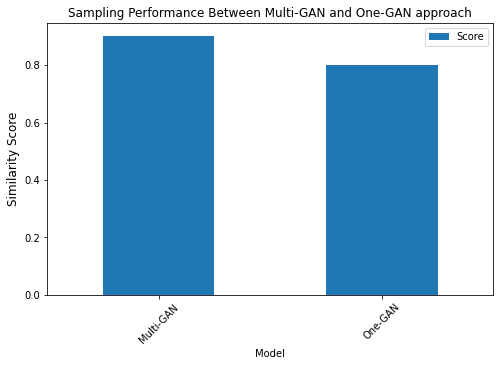

In [ ]:
#bar chart to compare performance of multi-GAN against single-GAN approaches
f, ax = plt.subplots(figsize=(8, 5))
TVAE_score_df.plot.bar(x = "Model",width = 0.5, ax=ax)
plt.xticks(rotation = 45)
plt.title('Sampling Performance Between Multi-GAN and Single-GAN approach', fontsize=12)
plt.ylabel('Similarity Score', fontsize=12)
plt.show()